# 2024-04-05 explore pro anti over days

this notebook is going to be used to explore how learning pro (block A) and anti (block B) over days (as opposed to blocked within a session) is working for a subset of animals.

The important steps to take are as follows:
1. determine how long the animal took to initially learn pro
2. determine what (if any) alternative curricula the animal experienced prior to the days
3. determine how long it takes to learn anti and if there is a difference for the sb reversal versus 1/2 xor rule (depicted below)
4. determine if exposure to pro or anti a second time has faster acquisition than the first time (i.e. transfer learning)
5. think about next steps to move from blocked days -> blocked within a session -> interleaved

**Definition**: learn

In the context of this notebook, learn means performing at or above 80% hits for at 3-5 days in a row. Exceptions to this term will be noted. 

## Defining Pro and Anti

This comes from an old task in the Brody lab where there are two block types. Pro is when the animal should follow the light. Anti is when the animal should move opposite of the light. Context is indicated by a sound cue.

In the setting of delayed match to sample, the use has become a bit murkier. There is a stimulus set that behaves similar to pro-anti. It is what I would call "sb reversal", where sa indicates the first stimulus in a trial and sb indicates the second. In this stimulus set, the first sound can be thought of as the context cue, and the second sound has an opposing rule (ie in pro 3khz is left, in anti 3khz is right). This stimulus set looks like this:


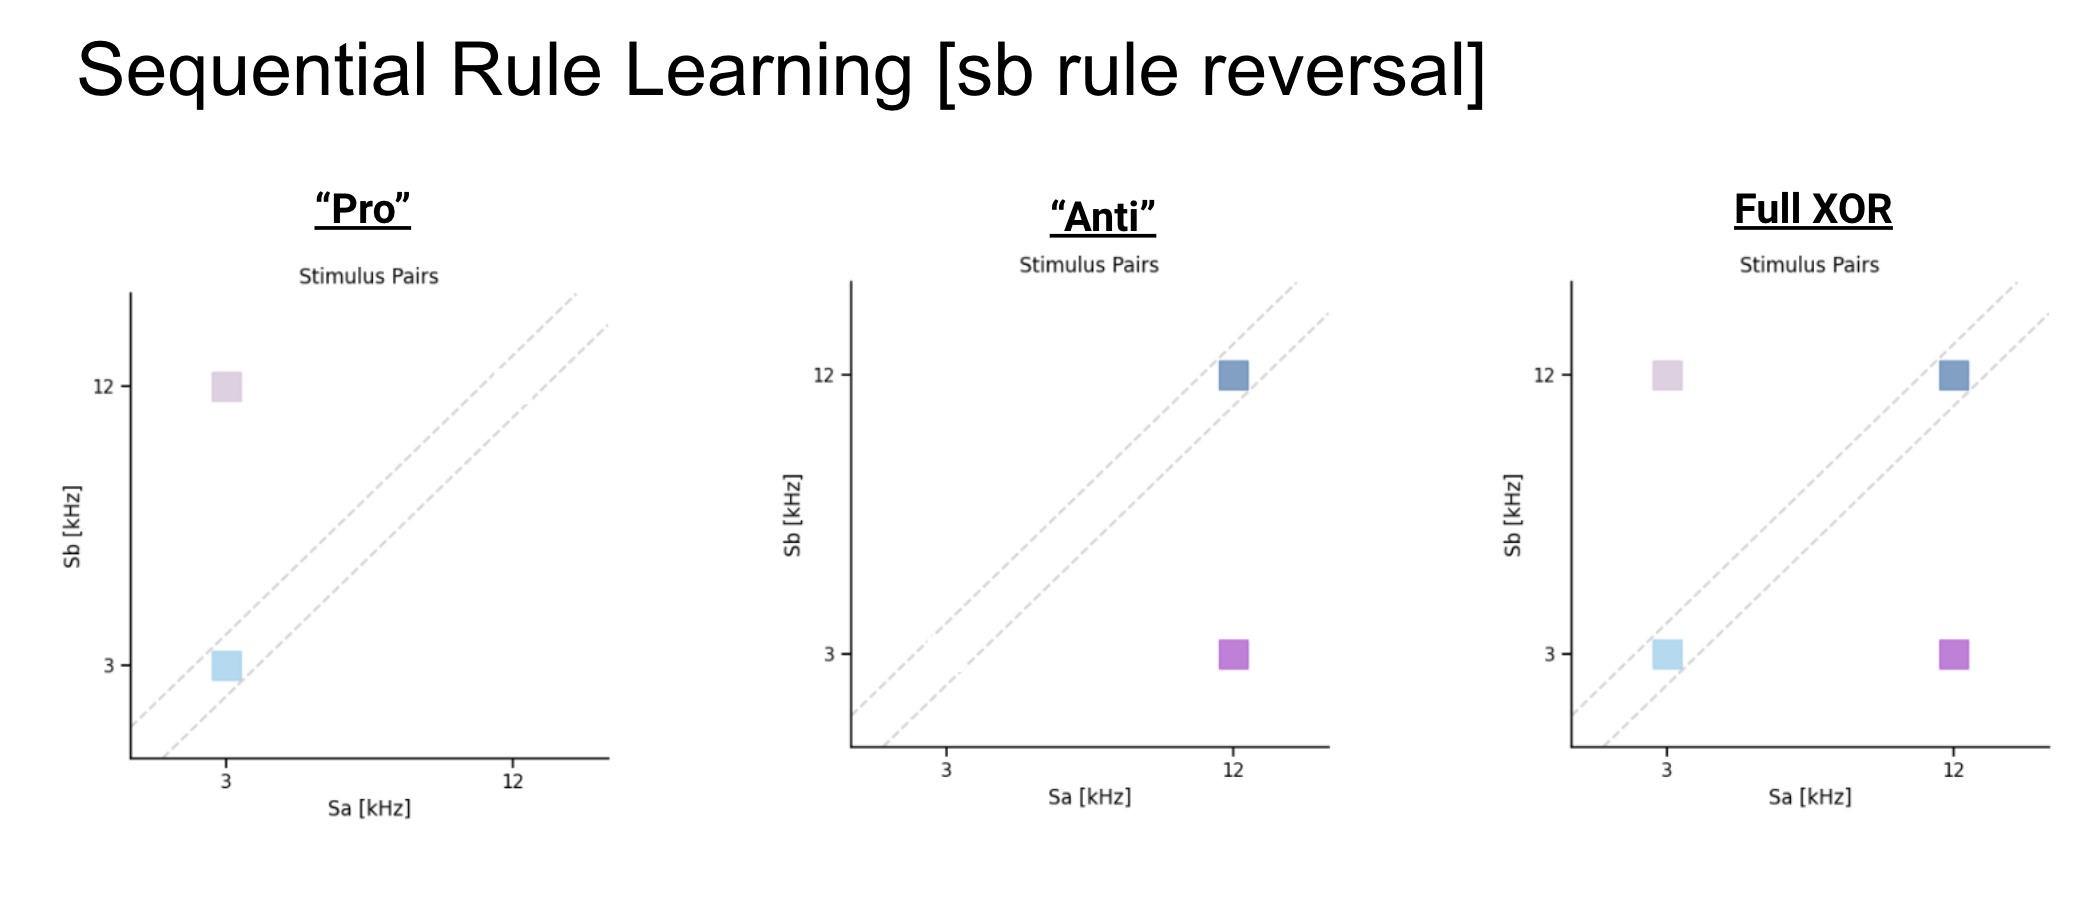


This has led to some success, but seems to require the anti block being light guided and then a weaning off of the light (which often doesn't go so well). I hypothesize that asking animals to completely reverse their decision boundary in such a way that is not representative of the final XOR decision boundary may be a limiting factor.

In this light, there is a second progressive stimulus set that I am exploring that creates a rule closer to the decision boundary. Block A or pro, is an sb rule, while block B or anti is an sa rule. Critically, it's the match pair that varies in each block (not the non-match which would lead to an orthogonal decision rule). When I was training, adding pairs in this order led to the most success. However, there were no blocks and the sample size was small (N=3).

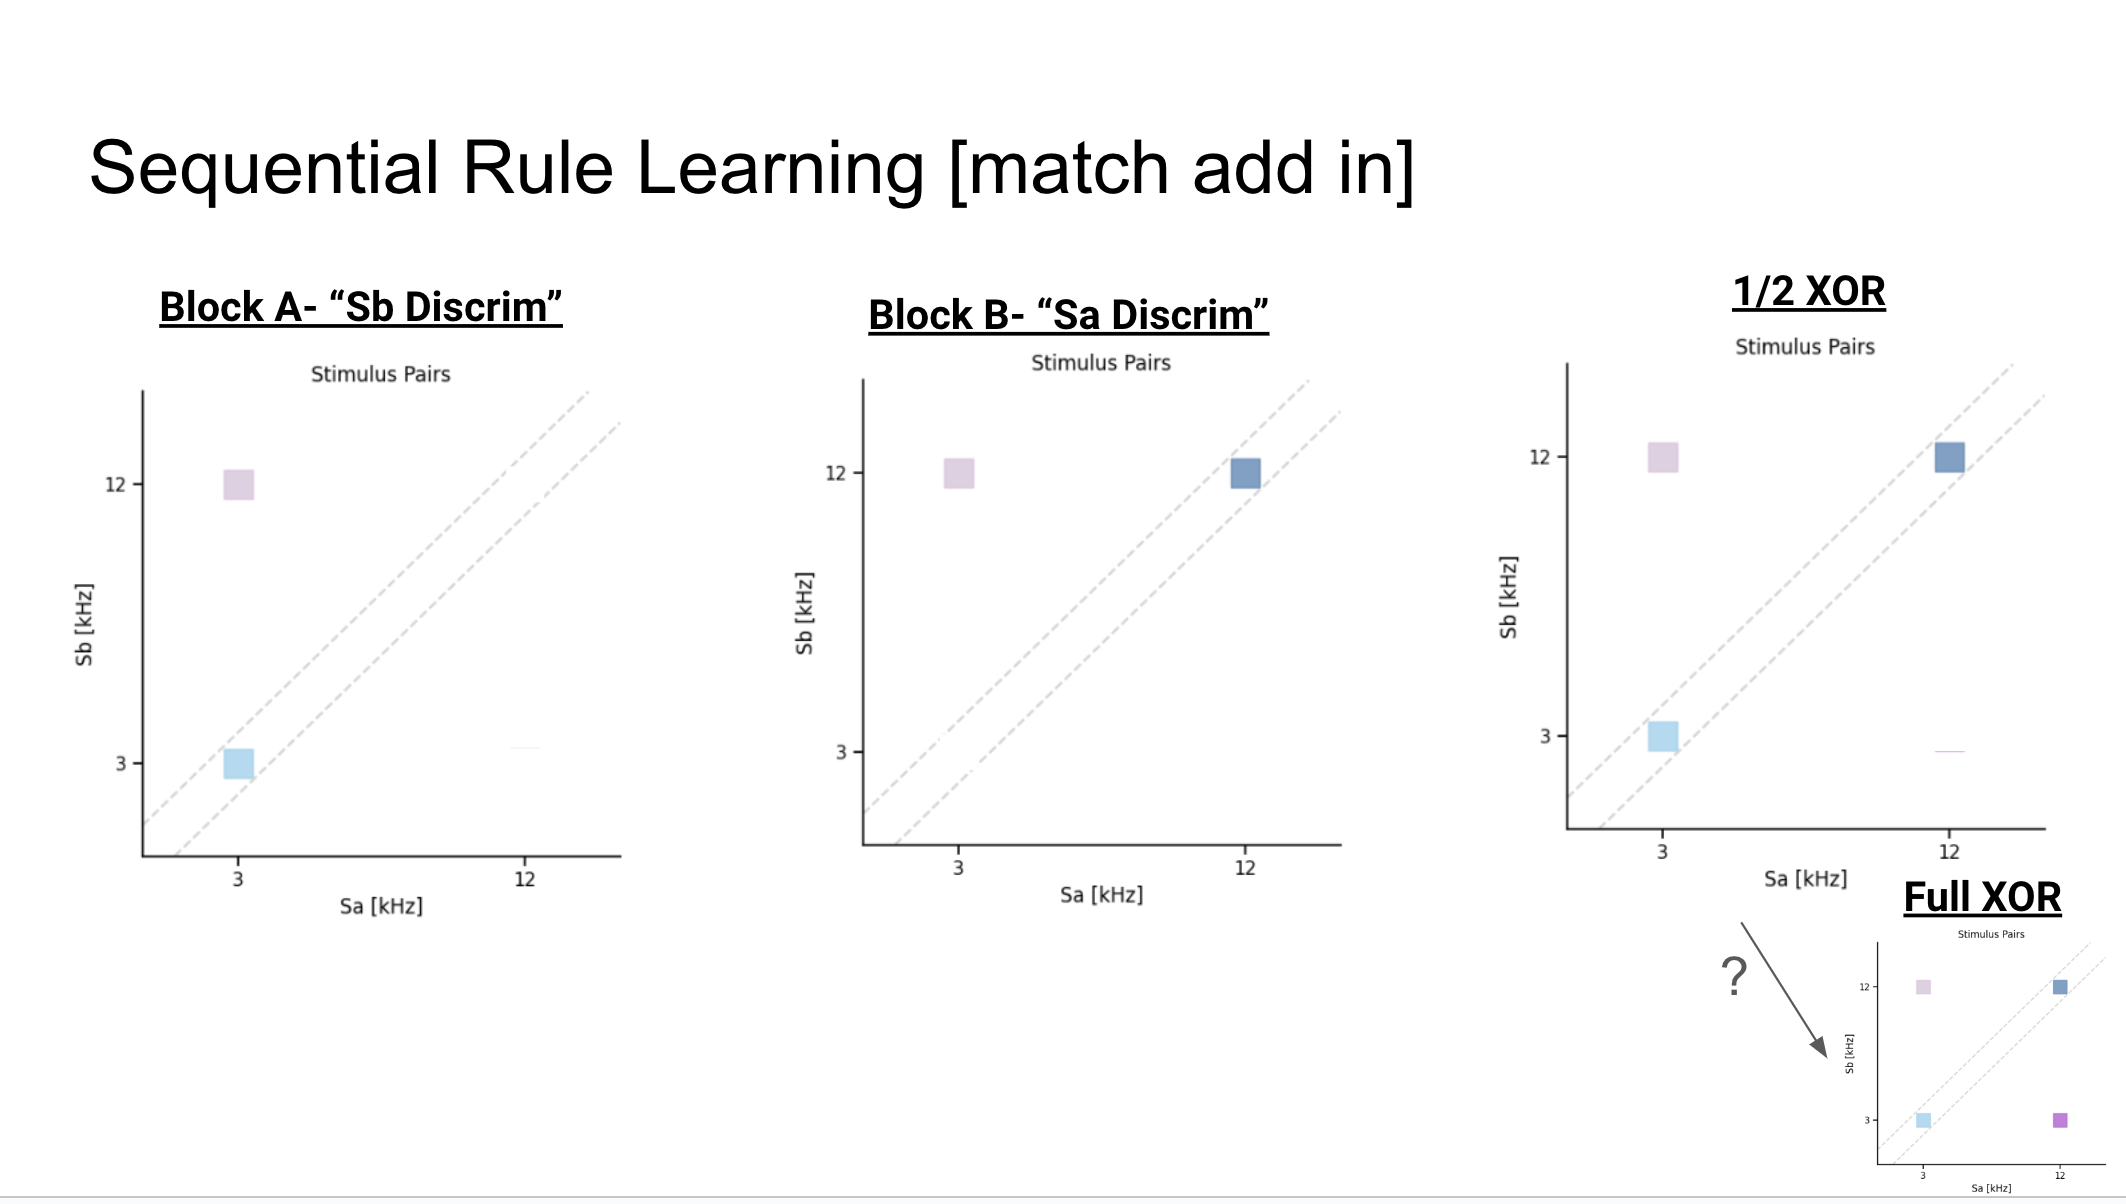

The biggest question for this stimulus set is how to get from 1/2 XOR to full XOR. Is it possible that weaning off light guided with the full set is easier than adding a 4th corner pair without guidance? Perhaps.  I will create a notebook to analyze that once animals have progressed far enough along.

## Load in 

In [70]:
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj

from plot_trials_info import *
from plot_days_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Analyze Single animal- R037

In [71]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=["R037"])

fetched 86 sessions for R037 between 2024-01-03 and 2024-04-06


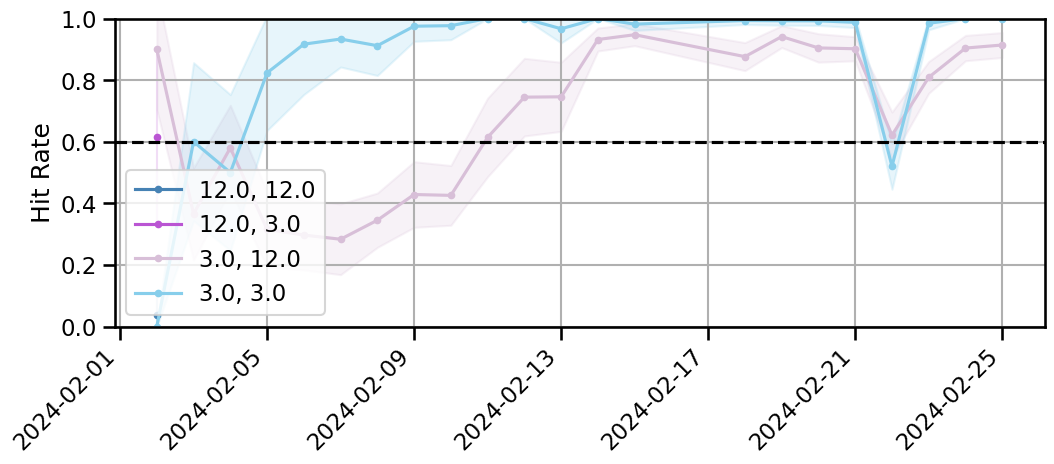

In [76]:
stages = [10, 11]
plot_performance_by_stim_over_days(
    trials_df.query("stage in @stages"), without_give=True
)

It appears it took this animal about 17 days to learn pro/block A (02-20-24). Lets see how they swich between pro and anti. Note that this plot will not represent the initial learning of pro- that is what the  previous plot is for.

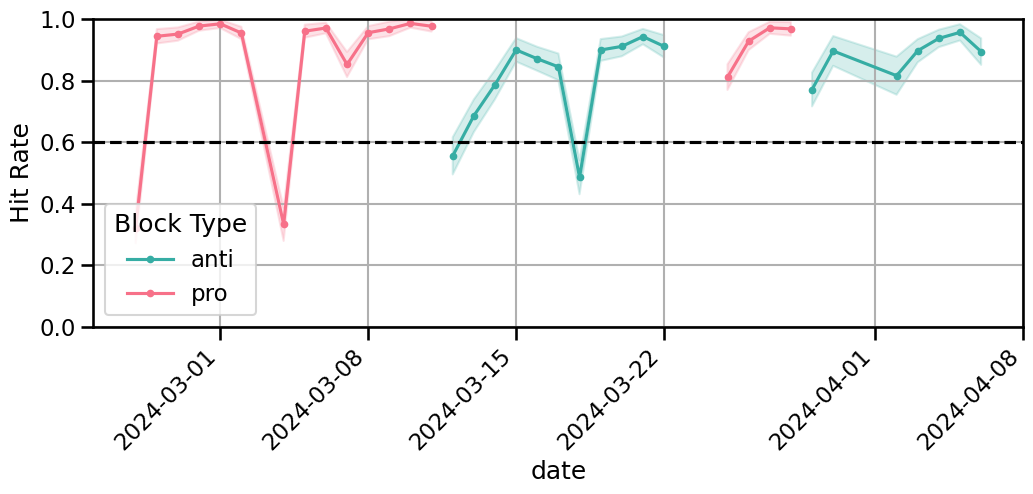

In [78]:
plot_performance_by_pro_anti_over_days(trials_df, without_give=True)

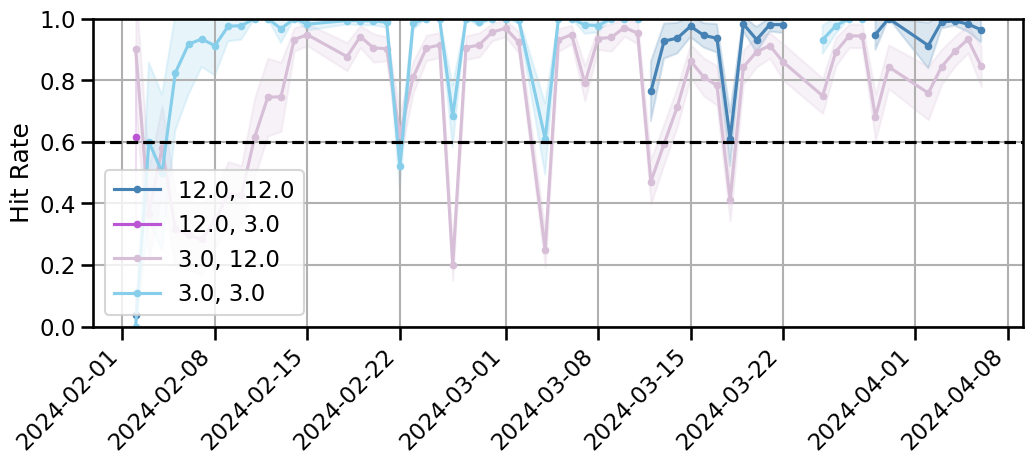

In [81]:
plot_performance_by_stim_over_days(trials_df.query("stage >= 10"), without_give=True)

Okay so it looks like the performance is pretty good. On 3/11, this animal was switched into anti-only. It took about a week to get anti. Then, they went back to pro and had no issue and same with the second return to anti. The next step for this animal will be to swtich overnight between pro and anti and then eventually, within a session.

One thing to note is this animal appears to have some sessions where they suddenly drop in performance. However, they appear to recover from these sessions without problem. 

## Analyze Single animal- R035

In [82]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=["R035"])

fetched 85 sessions for R035 between 2024-01-03 and 2024-04-06


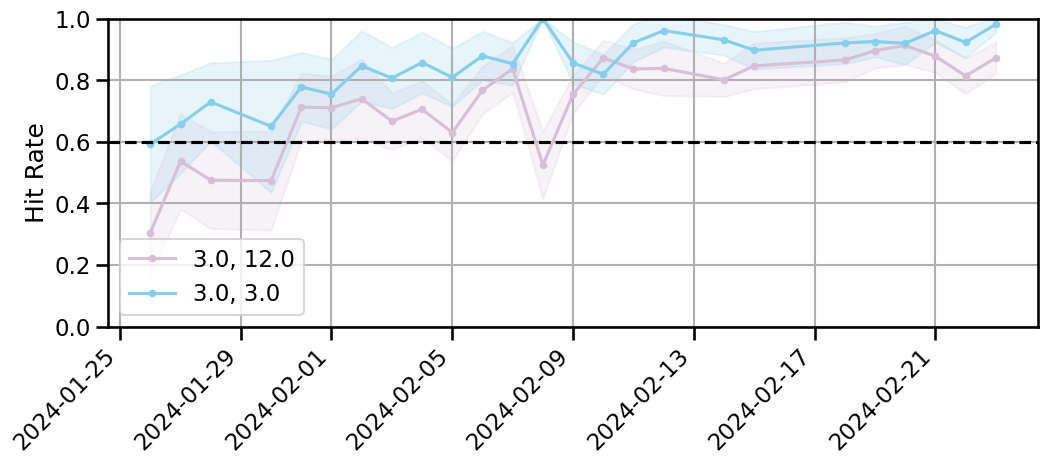

In [83]:
stages = [10, 11]
plot_performance_by_stim_over_days(
    trials_df.query("stage in @stages"), without_give=True
)

It appears it took this animal about 17 days to learn pro/block A (02-12-24). Lets see how they switch between pro and anti. Note that this plot will not represent the initial learning of pro- that is what the  previous plot is for.

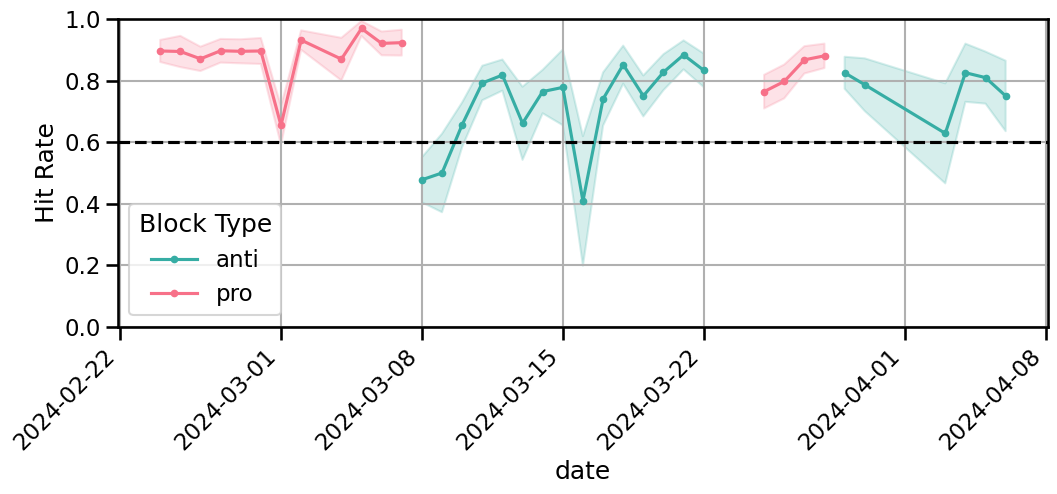

In [84]:
plot_performance_by_pro_anti_over_days(trials_df, without_give=True)

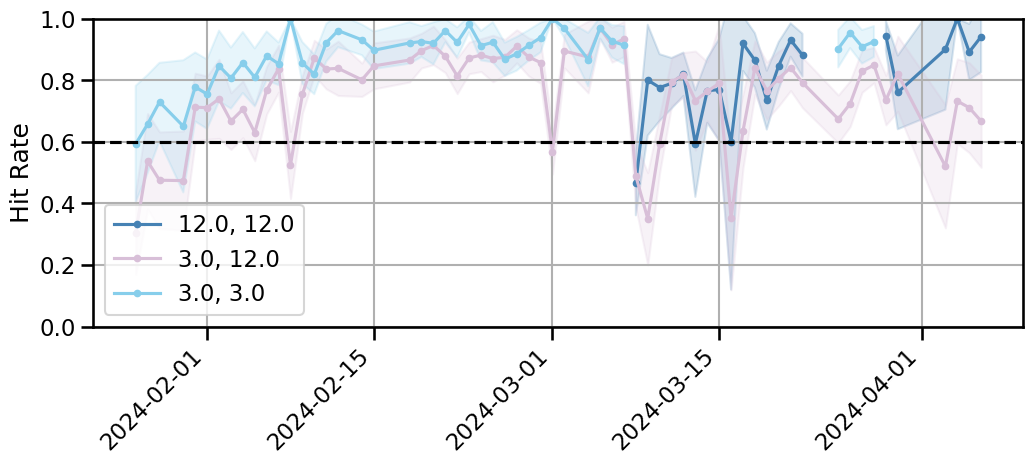

In [85]:
plot_performance_by_stim_over_days(trials_df.query("stage >= 10"), without_give=True)

Great- this is another animal that went straight into this curriculum and is doing well. on 3-8 they switched into anti and took 15 days to learn. Then, they switched back into pro without problem before going into anti a second time. This second switch was not as smooth- likely due to the 3 days off in the middle of it and getting free watered. This greatly decreases motivation. 

Now, lets checkout an animal with history of doing pro and anti within a session and then switching over days.

## Analyze Single animal- R021

In [86]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=["R021"])

fetched 151 sessions for R021 between 2023-10-14 and 2024-04-07


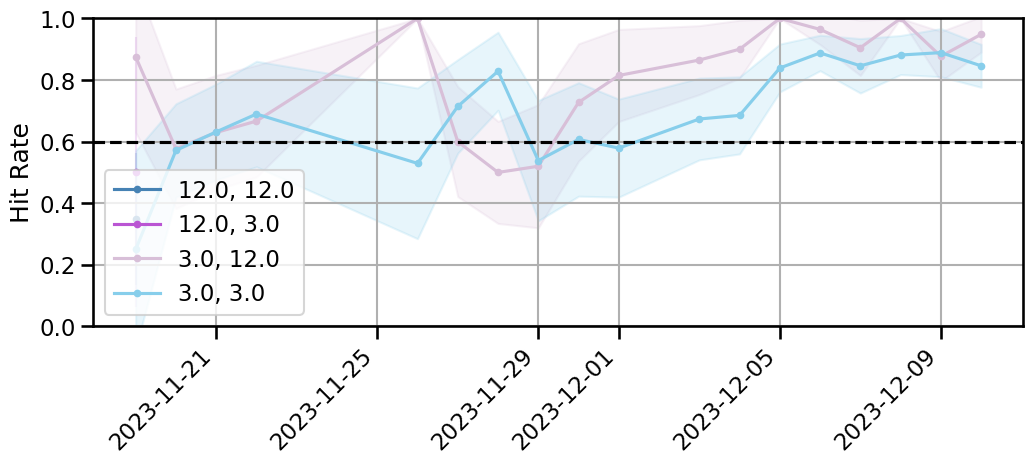

In [87]:
stages = [10, 11]
plot_performance_by_stim_over_days(
    trials_df.query("stage in @stages"), without_give=True
)

It appears it took this animal about 18 days to learn pro/block A (12-09-23). Lets see what their history of pro and anti looks like

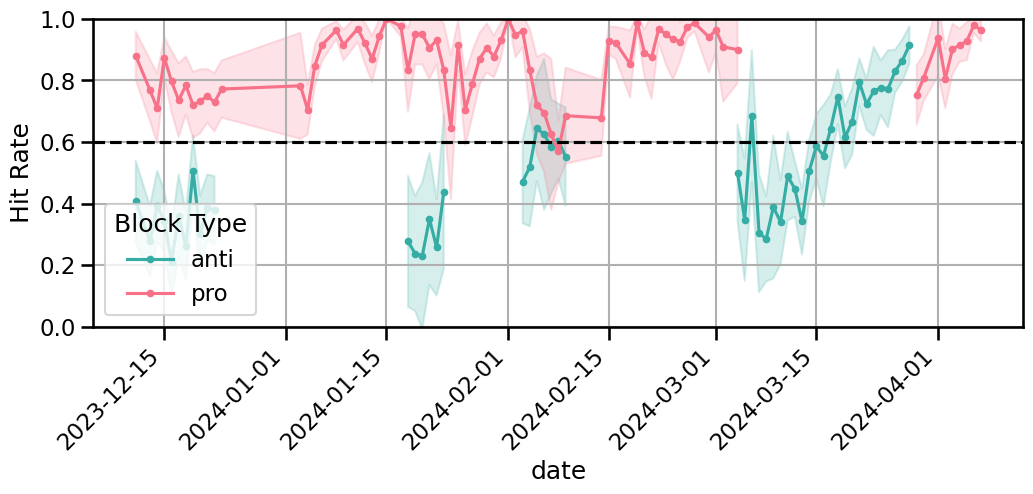

In [88]:
plot_performance_by_pro_anti_over_days(trials_df, without_give=False)

In decemeber and january, this animal was in curricula where both pro and anti were presented within a session (anti was light guided). However, this animal never really "got" anti, so they would often go back to only pro. On 2-15, I switched them to the pro-anti over days curriculum. Let's zoom in on that.

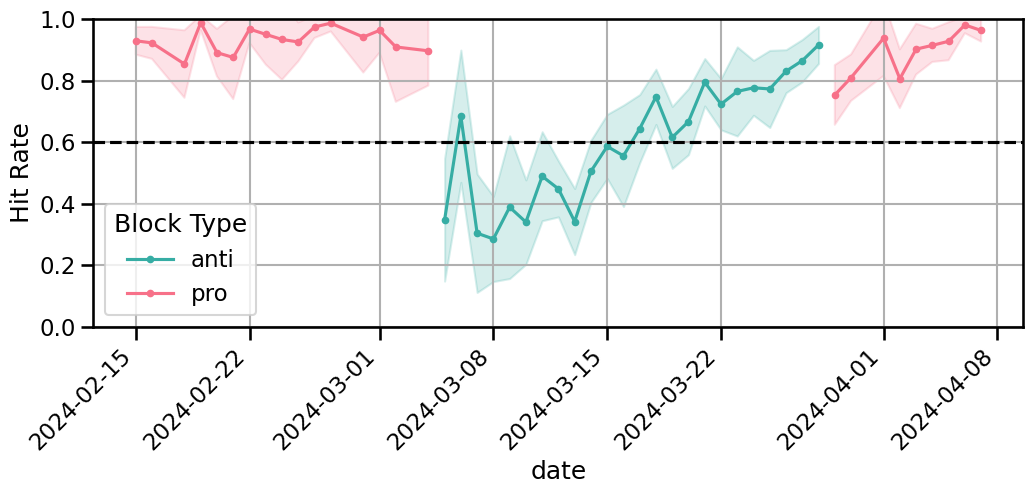

In [94]:
date = pd.Timestamp(2024, 2, 15).date()
plot_performance_by_pro_anti_over_days(
    trials_df.query("date >= @date"), without_give=True
)

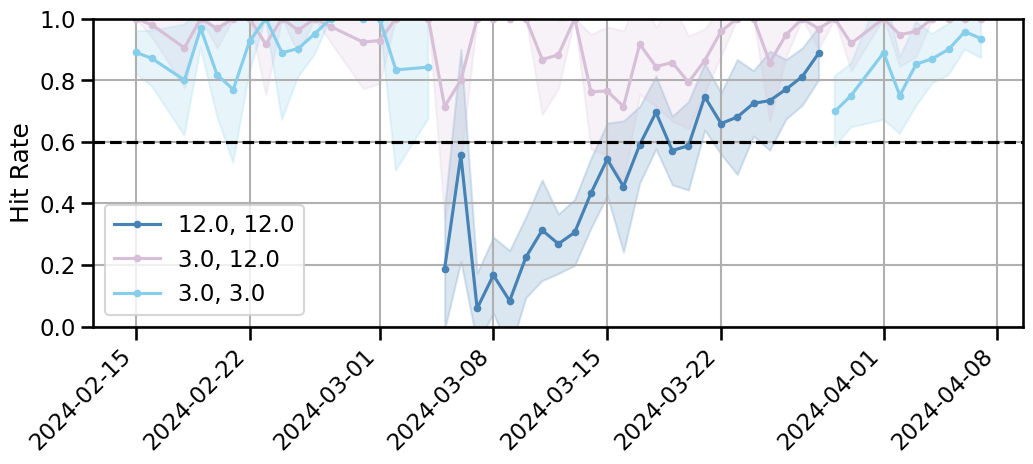

In [93]:
plot_performance_by_stim_over_days(trials_df.query("date >= @date"), without_give=True)

Great. So it looks like they were doing great in pro and then switched to anti around 3-4. Anti took a while to learn (25 days). They maintained the 3-12 pair, but took a while to learn the 12-12 new pair. And upon returning to pro, they still had it! This animal is now going back on anti so we will see what happens. 

Now lets see what some animals with the SB reversal look like (TODO)